In [6]:
import kagglehub
path = kagglehub.dataset_download("yasserh/titanic-dataset")

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(f"{path}/Titanic-Dataset.csv",sep=",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of passenger
- Age: Age of the passenger
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin: Cabin number of the passenger
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southhampton)

In [120]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
df.columns = ['Passenger ID', 'Survived', 'Class', 'Name', 'Sex', 'Age', 'Siblings_Spouses', 'Parent_children', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df.head()

,Passenger ID,Survived,Class,Name,Sex,Age,Siblings_Spouses,Parent_children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
df.isnull().sum()

Passenger ID          0
Survived              0
Class                 0
Name                  0
Sex                   0
Age                 177
Siblings_Spouses      0
Parent_children       0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
dtype: int64

In [136]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [138]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

I've first checked the names to see if they included any noble titles (baron, marquess, marquis, duke, etc.) that might indicate that these people had some kind of privilege to get on a rescue boat. But there is no such information in the names. Besides, for analysing the status of the passenger we have two other indicators (class and fare). Taking this into account, I will proceed to delete the column name, as it should not affect whether the person survived or not. I will do the same with the column passenger ID.

I have also taken a look at the ticket column, but here too there does not seem to be any information relevant to the passenger survival outcome. So, I will also delete this column.

Finally, I will also delete the column cabin as most of the values are null.

In [140]:
df = df.drop(['Passenger ID','Name','Ticket','Cabin'], axis = 1)
df.head()

,Survived,Class,Sex,Age,Siblings_Spouses,Parent_children,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We still need to handle some null values from the columns age and Embarked. For Age we will take the average value and for Embarked the mode (the most represented value).

In [156]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

Survived            0
Class               0
Sex                 0
Age                 0
Siblings_Spouses    0
Parent_children     0
Fare                0
Embarked            0
dtype: int64

In [158]:
df.head()

,Survived,Class,Sex,Age,Siblings_Spouses,Parent_children,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [160]:
df.duplicated().sum()

111

In [164]:
df = df.drop_duplicates()

In [168]:
df['Survived'].value_counts(normalize = True).round(2)

Survived
0    0.59
1    0.41
Name: proportion, dtype: float64

After cleaning our dataset, we can see that although the target variable is not perfectly balanced, it is not bad (59% versus 41%).

In [171]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [223]:
df.dtypes

Survived              int64
Class                 int64
Sex                   int64
Age                 float64
Siblings_Spouses      int64
Parent_children       int64
Fare                float64
Embarked              int64
dtype: object

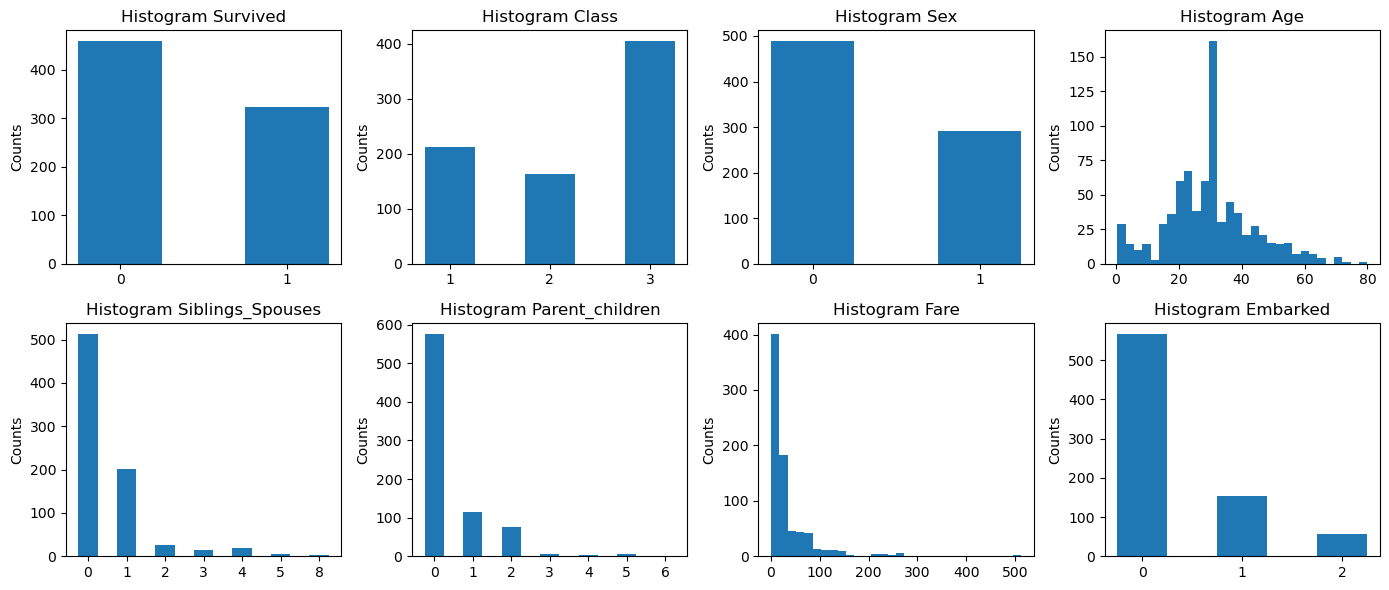

In [289]:
plt.figure(figsize=(14,6))

columns = df.columns
n_rows = np.ceil(len(columns)/4).astype(int)
i = 0

for i, c in enumerate(columns):
    plt.subplot(n_rows, 4, i+1)

    if df[c].nunique() < 10:      
        value_counts = df[c].value_counts().sort_index()
        plt.bar(value_counts.index.astype(str), value_counts.values, width = 0.5)
    else:
        plt.hist(df[c], bins = 30)
   
    plt.title(f'Histogram {c}')
    plt.ylabel('Counts')

plt.tight_layout()
plt.show()

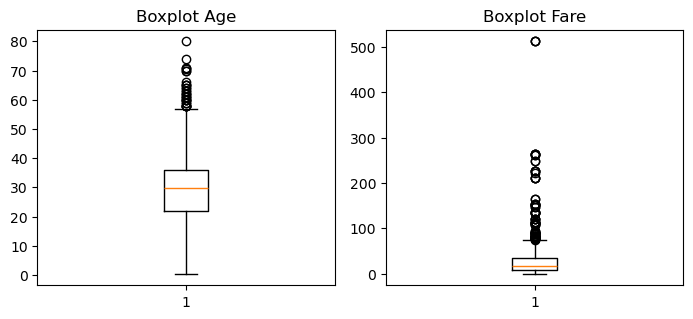

In [291]:
plt.figure(figsize=(14,6))

cont_columns = []
for c in columns:
    if df[c].nunique() > 10:
        cont_columns = np.append(cont_columns, c)

for i, c in enumerate(cont_columns):
    
    plt.subplot(n_rows, 4, i+1)
    plt.boxplot(df[c])
    plt.title(f'Boxplot {c}')
    
plt.tight_layout()
plt.show()

Using the histograms, we have already seen that the distribution of the continuous variables is positively skewed. Using the boxplots, we can better recognise the outliers, especially for the variable Fare. We need to take these outliers into account when creating the prediction algorithm, as some models are more sensitive to outliers than others.

<Figure size 800x600 with 0 Axes>

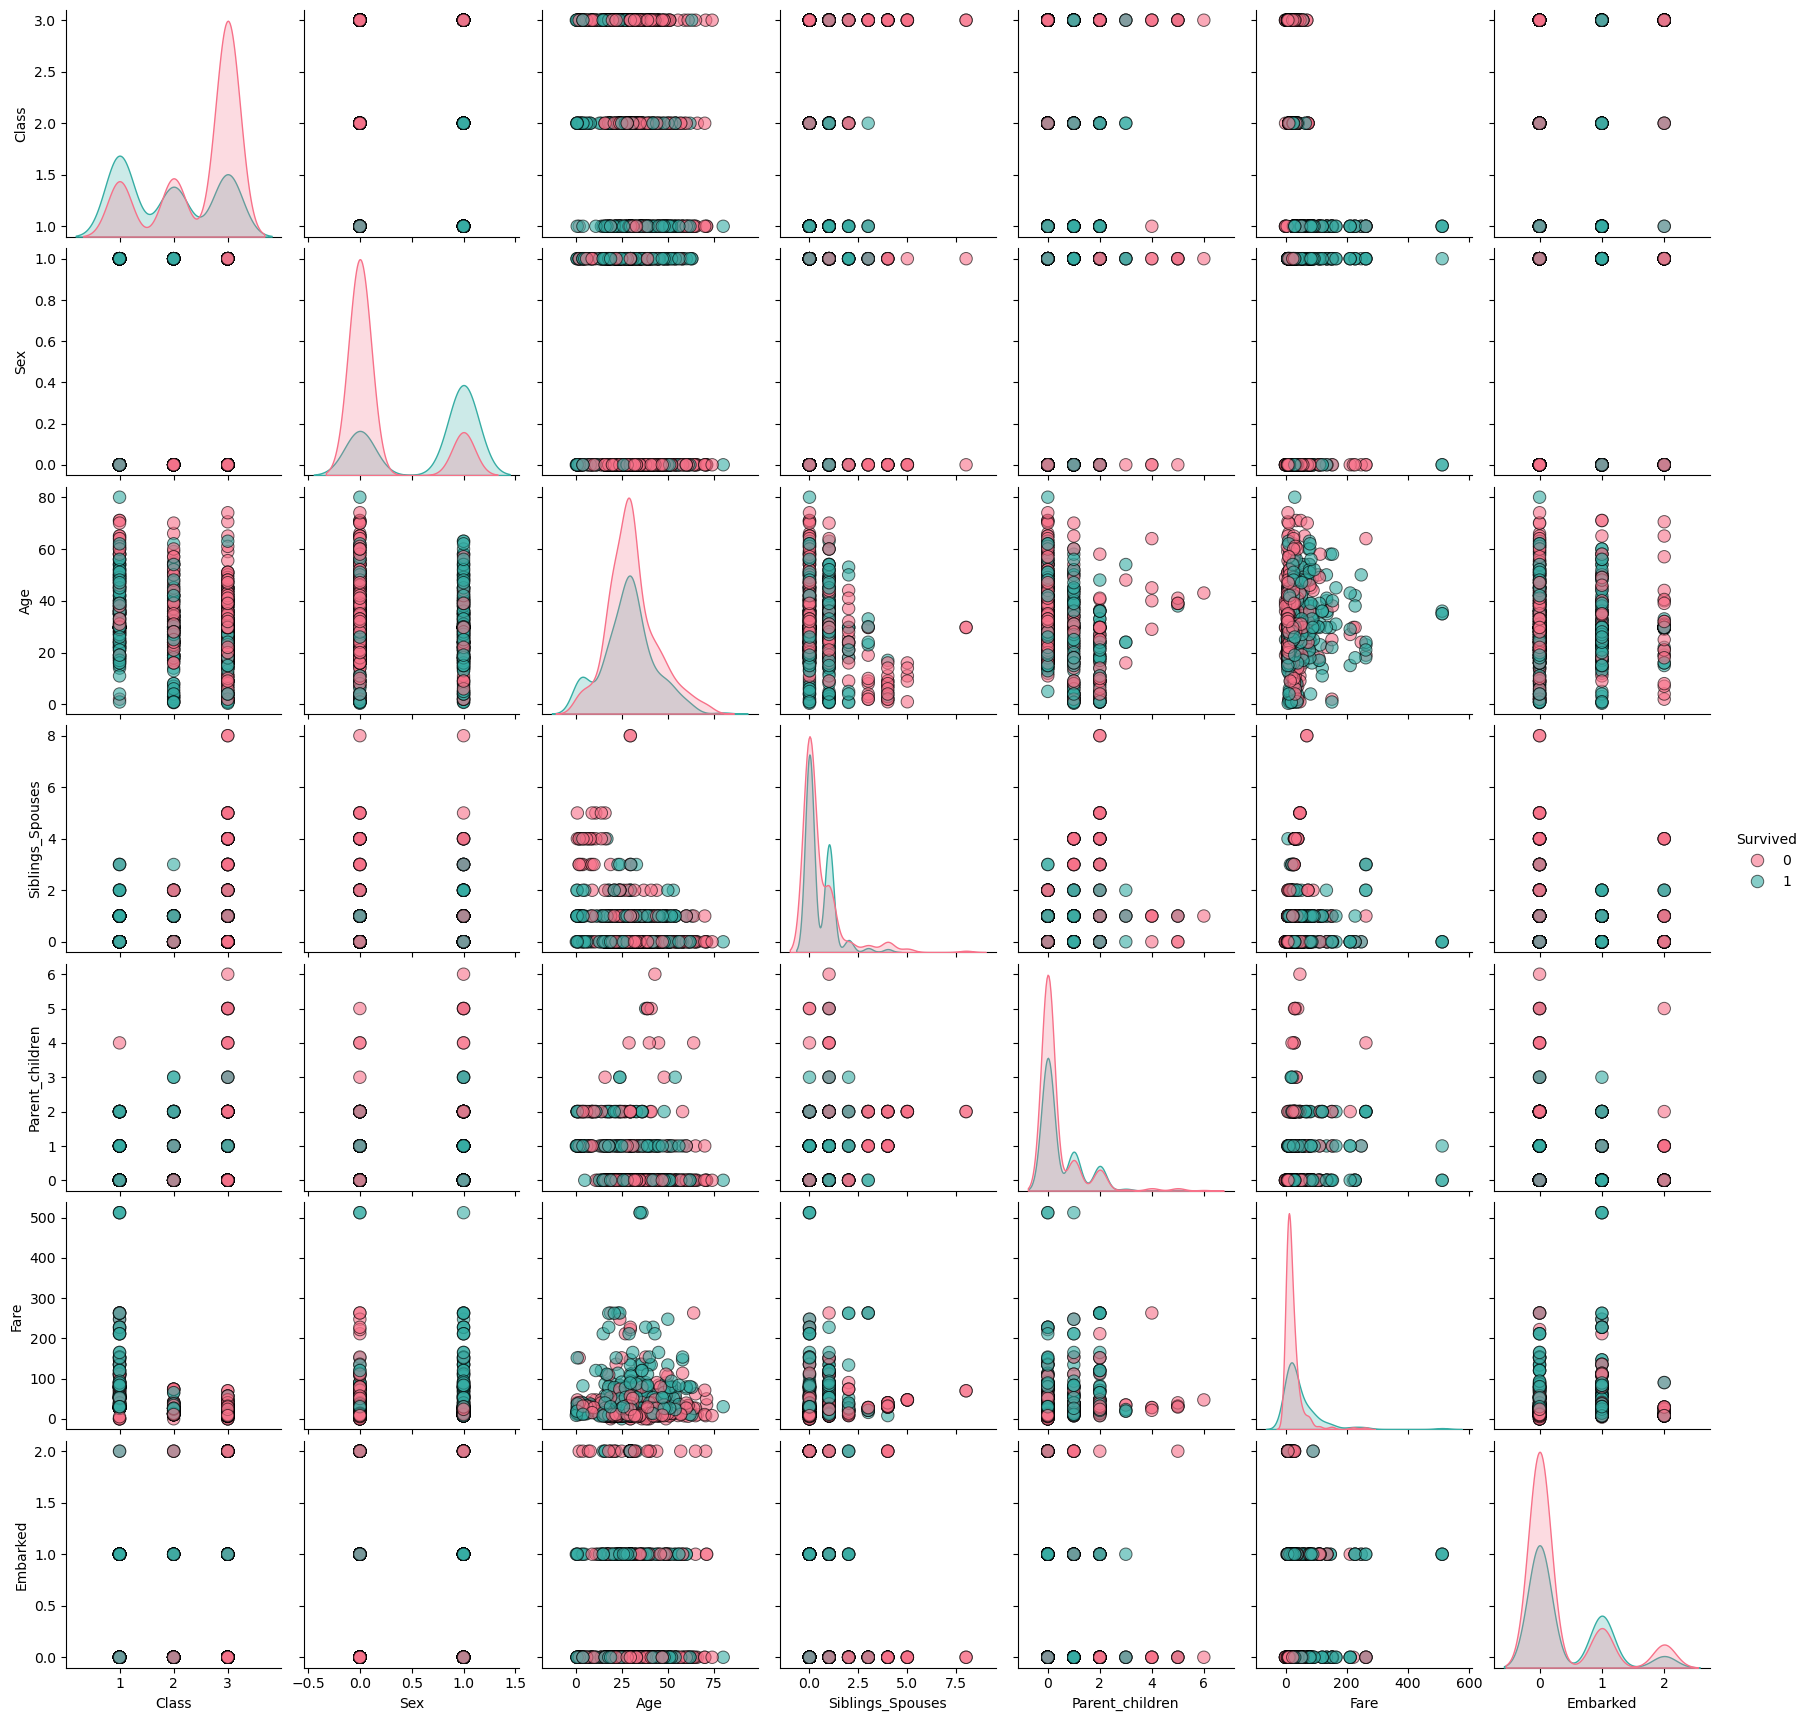

In [306]:
plt.figure(figsize=(8,6))
sns.pairplot(df, hue="Survived", palette="husl", plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.show()

We will complement the pair plots with a correlation matrix.

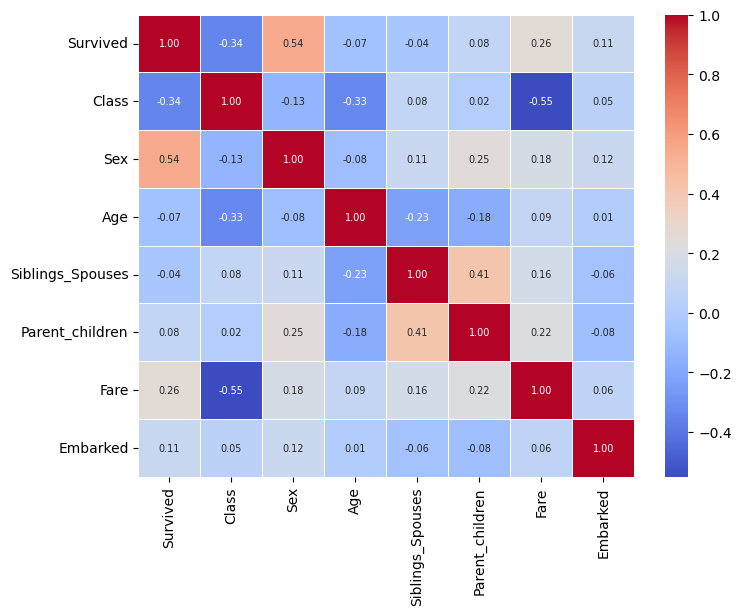

In [167]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.show()

Insights from the pair plot and matrix correlation visualisations:
- Sex appears to have the strongest correlation with Survival (0.54). This aligns with the fact that female passengers had a higher survival rate on the Titanic.
- Class is negatively correlated with Survival (-0.34). Since 'Class' is coded as 1st, 2nd, 3rd (numerically 1, 2, 3), a negative correlation means that being in 1st class (lower numeric value) is associated with higher survival, while being in 3rd class (higher numeric value) is associated with lower survival.
- Fare has a moderate positive correlation (0.26) with Survival. Passengers who paid higher fares (likely 1st class) tended to have a better chance of survival. It is also aligned with the previous point.
- Class and Fare are strongly negatively correlated (-0.55). This makes sense: 1st class tickets are the most expensive (lower class number → higher fare. 
- Age has only a weak negative correlation with Survival (-0.07). This suggests that age by itself (at least linearly) isn’t a very strong predictor of survival in this dataset.
- We see also a moderate negative correlation of about -0.33 between Class and Age. This makes sense if older (often wealthier) individuals could afford the higher-priced tickets, while younger passengers were more likely traveling in lower-cost (Third) class.
- Family-related columns (Siblings_Spouses and Parent_children) show a moderate positive correlation (0.41) with each other, which is intuitive—larger families often have both siblings/spouses and parents/children on board.
- Embarked has only a small correlation (0.11) with Survival. This indicates that where a passenger boarded (C, Q, S) doesn’t appear to have as strong an impact on survival as factors like Sex or Class, at least in a purely linear sense.

In [314]:
df.head()

,Survived,Class,Sex,Age,Siblings_Spouses,Parent_children,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [439]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

X = df.drop('Survived', axis = 1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Logistic Regression -> Training Accuracy: {train_accuracy:.2f}")
print(f"Logistic Regression -> Test Accuracy: {test_accuracy:.2f}")

Logistic Regression -> Training Accuracy: 0.77
Logistic Regression -> Test Accuracy: 0.78


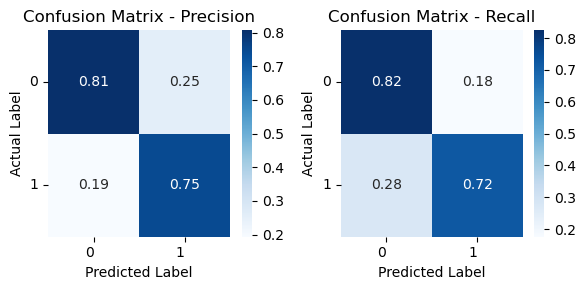

In [441]:
conf_matrix_precision = confusion_matrix(y_test, y_pred, normalize = "pred")
conf_matrix_recall = confusion_matrix(y_test, y_pred, normalize = "true")

plt.figure(figsize=(6,3))

plt.subplot(1, 2, 1)
heatmap = sns.heatmap(conf_matrix_precision, annot=True, cmap="Blues", fmt=".2f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha="right")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix - Precision")

plt.subplot(1, 2, 2)
heatmap = sns.heatmap(conf_matrix_recall, annot=True, cmap="Blues", fmt=".2f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha="right")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix - Recall")

plt.tight_layout()
plt.show()

- 78% of the survival outcomes are predicted correctly (Accuracy)
- From the confusion matrix on the left (precision analyis): For non-survival (class 0), 81% of predictions are correct. For survival (class 1), 75% of predictions are correct.
- From the confusion matrix on the right (recall analyis): For non-survival (class 0), 82% of actual non-survivals are identified. For survival (class 1), 72% of actual survivals are identified.

Overall, we can therefore conclude that the model works quite well. The predictions for class 0 (non-survival) are slightly better, but this may also be because the classes are a little unbalanced towards 0. As we saw earlier, the ratio is 59/41. In such cases, calculating the F1 score can be helpful, so let's do that.

In [443]:
f1 = f1_score(y_test, y_pred, average='binary') 
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.73


In [445]:
df['Familiy_Size'] = df['Siblings_Spouses'] + df['Parent_children'] + 1
df.head()

,Survived,Class,Sex,Age,Siblings_Spouses,Parent_children,Fare,Embarked,Familiy_Size
0,0,3,0,22.0,1,0,7.2500,0,2
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,1


In [447]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

X = df.drop(['Survived','Fare','Siblings_Spouses','Parent_children','Embarked'], axis = 1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Logistic Regression -> Training Accuracy: {train_accuracy:.2f}")
print(f"Logistic Regression -> Test Accuracy: {test_accuracy:.2f}")

Logistic Regression -> Training Accuracy: 0.76
Logistic Regression -> Test Accuracy: 0.80


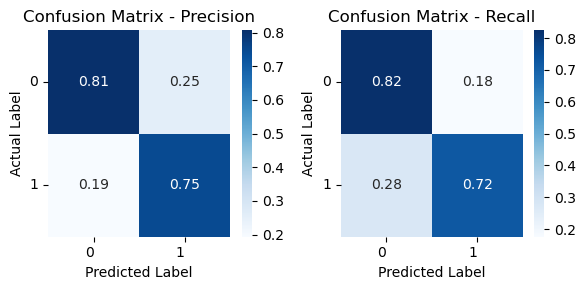

In [449]:
conf_matrix_precision = confusion_matrix(y_test, y_pred, normalize = "pred")
conf_matrix_recall = confusion_matrix(y_test, y_pred, normalize = "true")

plt.figure(figsize=(6,3))

plt.subplot(1, 2, 1)
heatmap = sns.heatmap(conf_matrix_precision, annot=True, cmap="Blues", fmt=".2f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha="right")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix - Precision")

plt.subplot(1, 2, 2)
heatmap = sns.heatmap(conf_matrix_recall, annot=True, cmap="Blues", fmt=".2f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha="right")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix - Recall")

plt.tight_layout()
plt.show()

Since siblings_spouse and parents_children showed a positive correlation, I decided to combine them into a single column (family size).
I also decided to simplify the model and remove the Fare column. We already have the Class column with a stronger correlation to the target variable.
Finally, I also decided to delete the Embarkation column as the correlation matrix showed no correlation with other variables and a priori the place where the passenger embarked should have no influence on the survival outcome.
These adjustments slightly improved the performance of the logistic regression model.

- 80% of the survival outcomes are predicted correctly (Accuracy)
- From the confusion matrix on the left (precision analyis): For non-survival (class 0), 82% of predictions are correct. For survival (class 1), 77% of predictions are correct.
- From the confusion matrix on the right (recall analyis): For non-survival (class 0), 85% of actual non-survivals are identified. For survival (class 1), 74% of actual survivals are identified.

Let's try another model now: Decision Tree

In [451]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_dt_train_pred = dt_model.predict(X_train_scaled)
y_dt_test_pred = dt_model.predict(X_test_scaled)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_dt_train_pred)
test_accuracy = accuracy_score(y_test, y_dt_test_pred)

print(f"Decision Tree -> Training Accuracy: {train_accuracy:.2f}")
print(f"Decision Tree -> Test Accuracy: {test_accuracy:.2f}")

Decision Tree -> Training Accuracy: 0.92
Decision Tree -> Test Accuracy: 0.75


In [466]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=10,           # Prevent overfitting
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_rf_train_pred = rf_model.predict(X_train_scaled)
y_rf_test_pred = rf_model.predict(X_test_scaled)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_rf_train_pred)
test_accuracy = accuracy_score(y_test, y_rf_test_pred)

print(f"Random Forest -> Training Accuracy: {train_accuracy:.2f}")
print(f"Random Forest -> Test Accuracy: {test_accuracy:.2f}")

Random Forest -> Training Accuracy: 0.92
Random Forest -> Test Accuracy: 0.78
